# Importing required Modules and Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# Importing the Dataset

In [3]:
df=pd.read_csv(r'C:\Users\Sony\Desktop\bike-sharing-hour.csv')

checking the first five rows of the dataset

In [4]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Lets start the EDA process on this Dataset

Checking the number of rows and columns of the dataset

In [5]:
df.shape

(17379, 17)

This dataset has 17379 rows and 17 columns

Checking the Datatypes of all the values of the Dataset.

In [6]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Checking the names of all columns separately.

In [7]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Now we will check the null values in each columns.

In [8]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Luckily we dont have any null value in any column.

When we gone through checking the datatypes of each columns then it is observed that one of the column
named "dteday" is in string format or object format,while all others are numerical.

So we need to work on it first before we go for further analysis.


So now we will rename the columns so that they can be easily readable and also change some columns'
Datatyes where ever necessary.

In [9]:
df.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)

Now again we will go through the dataset again to observe more of the values.

In [10]:
df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


If we go through the problem statement ,we will find that few of the columns contains values which can
easily be converted into categories.Those columns in detail are given below-

season : season (1:springer, 2:summer, 3:fall, 4:winter)

yr : year (0: 2011, 1:2012)

mnth : month ( 1 to 12)

hr : hour (0 to 23)

holiday : weather day is holiday or not

weekday : day of the week

workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

weathersit :

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    
So to make out job easier lets convert all these values in categorical variables.

In [11]:
df['season'] = df.season.astype('category')
df['is_holiday'] =df.is_holiday.astype('category')
df['weekday'] = df.weekday.astype('category')
df['weather_condition'] = df.weather_condition.astype('category')
df['is_workingday'] = df.is_workingday.astype('category')
df['month'] = df.month.astype('category')
df['year'] = df.year.astype('category')
df['hour'] = df.hour.astype('category')


# Outlier Analysis

Plotting the boxplots for detecting the outliers

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Temperature'),
 Text(0.5, 1.0, 'Box Plot On Count Across Temperature')]

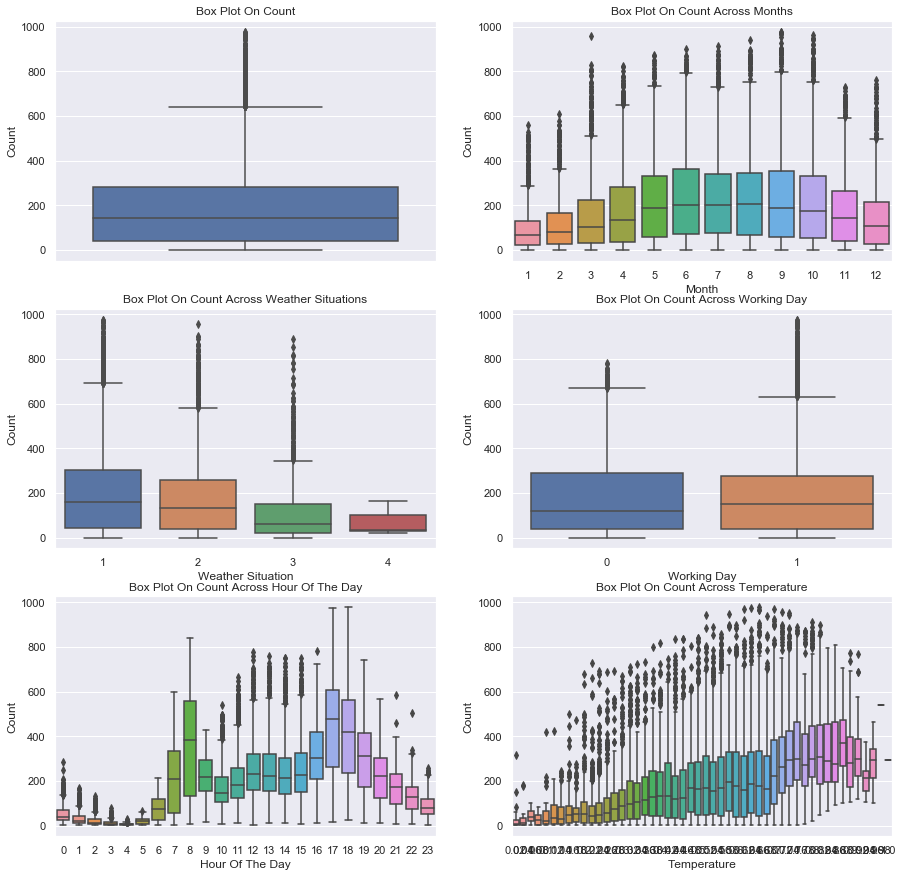

In [12]:
sns.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15, 15)
sns.boxplot(data=df,y="total_count",orient="v",ax=axes[0][0])
sns.boxplot(data=df,y="total_count",x="month",orient="v",ax=axes[0][1])
sns.boxplot(data=df,y="total_count",x="weather_condition",orient="v",ax=axes[1][0])
sns.boxplot(data=df,y="total_count",x="is_workingday",orient="v",ax=axes[1][1])
sns.boxplot(data=df,y="total_count",x="hour",orient="v",ax=axes[2][0])
sns.boxplot(data=df,y="total_count",x="temp",orient="v",ax=axes[2][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Month', ylabel='Count',title="Box Plot On Count Across Months")
axes[1][0].set(xlabel='Weather Situation', ylabel='Count',title="Box Plot On Count Across Weather Situations")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")
axes[2][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[2][1].set(xlabel='Temperature', ylabel='Count',title="Box Plot On Count Across Temperature")

Interpretation: The working day and holiday box plots indicate that more bicycles are rent during
normal working days than on weekends or holidays. The hourly box plots show a local maximum at 8 am
and one at 5 pm which indicates that most users of the bicycle rental service use the bikes to get to
work or school. Another important factor seems to be the temperature: higher temperatures lead to an
increasing number of bike rents and lower temperatures not only decrease the average number of rents
but also shows more outliers in the data.

# Removing Outliers from the Data

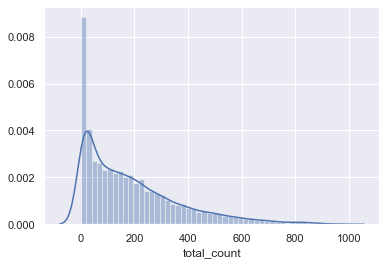

In [13]:
sns.distplot(df['total_count']);

The distribution plot of the count values reveals that the count values do not match a normal
distribution. We will use the median and interquartile range (IQR) to identify and remove outliers
from the data. (An alternative approach would be the transformation of the target values to a normal
distribution and using mean and standard deviation)
                

Samples in dataset with outliers: 17379
Samples in dataset without outliers: 16874


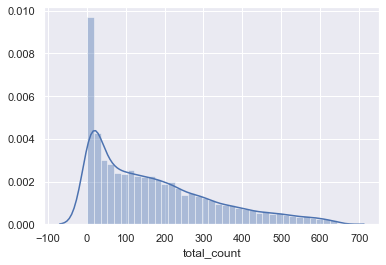

In [14]:
print("Samples in dataset with outliers: {}".format(len(df)))
q1 = df.total_count.quantile(0.25)
q3 = df.total_count.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
df_preprocessed = df.loc[(df.total_count >= lower_bound) & (df.total_count <= upper_bound)]
print("Samples in dataset without outliers: {}".format(len(df_preprocessed)))
sns.distplot(df_preprocessed.total_count);

# Checking the Skewness of the Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A98113F2E8>,
      dtype=object)

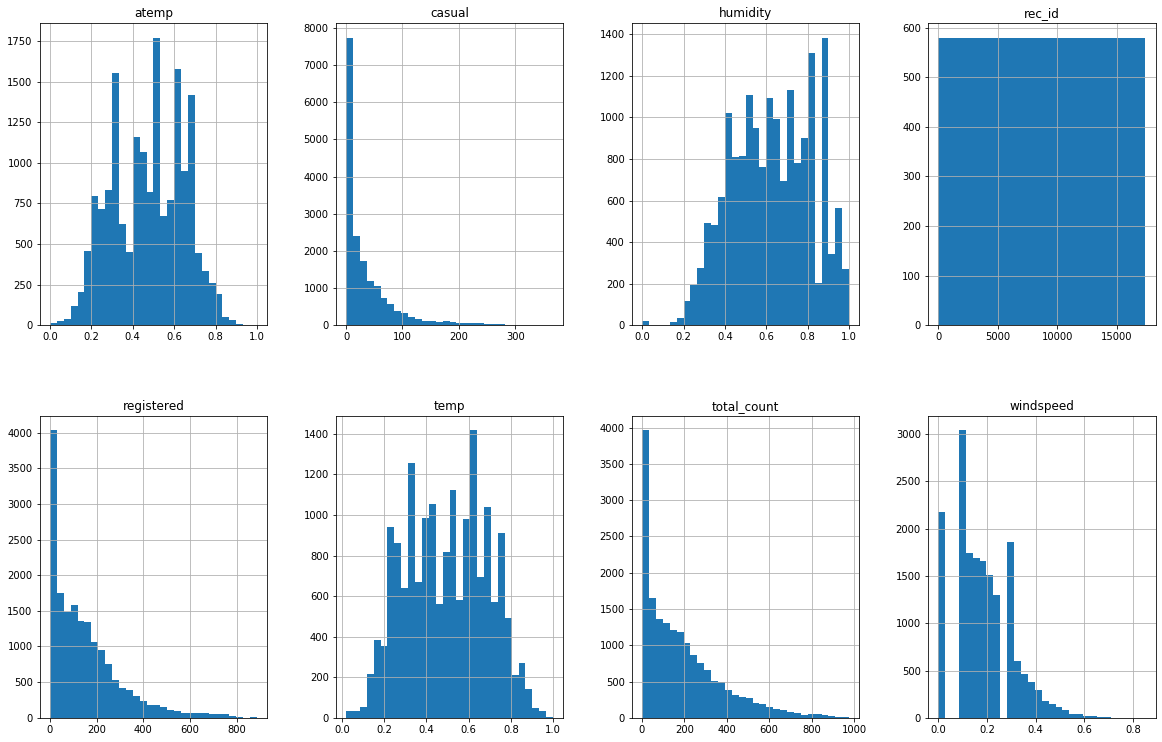

In [12]:
df.hist(figsize=(20,20), grid = True, layout = (3,4), bins = 30)

# Correlation Analysis

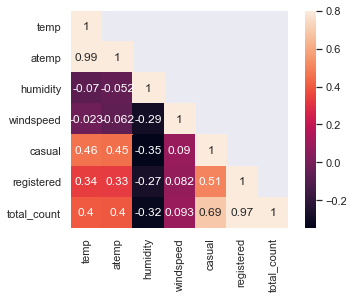

In [15]:
corrMatt = df[['temp',
                    'atemp', 
                    'humidity', 
                    'windspeed', 
                    'casual', 
                    'registered', 
                    'total_count']].corr()

mask = np.array(corrMatt)
# Turning the lower-triangle of the array to false
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
sns.heatmap(corrMatt, 
            mask=mask,
            vmax=.8, 
            square=True,
            annot=True,
            ax=ax)

Conclusion: At the end of the descriptive analysis chapter, we can note the following points:

Casual and registered contain direct information about the bike sharing count which is to predict
(data leakage). Therefore they are not considered in the feature set.

The variables "temp" and "atemp" are strongly correlated. To reduce the dimensionality of the
predictive model, the feature "atemp" is dismissed.

The variables "hour" and "temp" seem to be promising features for the bike sharing count prediction.

# Univariate and Bivariate Analysis

In [16]:
# Configuring plotting visual and sizes
sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)


[Text(0.5, 1.0, 'Season wise hourly distribution of counts')]

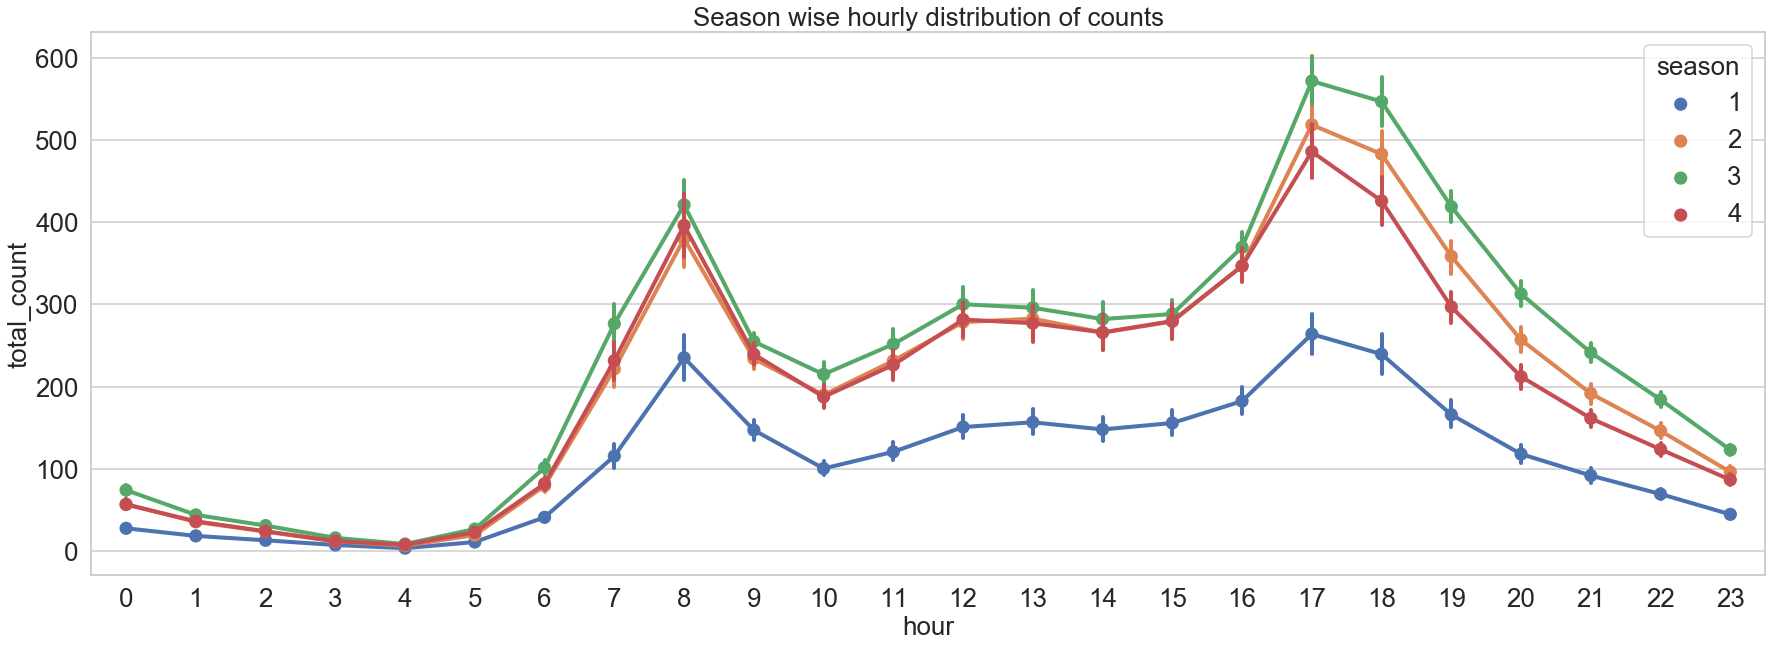

In [17]:
fig,ax = plt.subplots()
sns.pointplot(data=df[['hour',
                           'total_count',
                           'season']],
              x='hour',
              y='total_count',
              hue='season',
              ax=ax)
ax.set(title="Season wise hourly distribution of counts")

Observation-

1. We can see the graph above that the output variable "total_count" shows higher trend at around 8AM
   and around 5PM.
    
2. This means most of the bike bookings are done by either office going people or school/college going
   people.
    
Lets check for weekly bookings--

[Text(0.5, 1.0, 'Weekday wise hourly distribution of counts')]

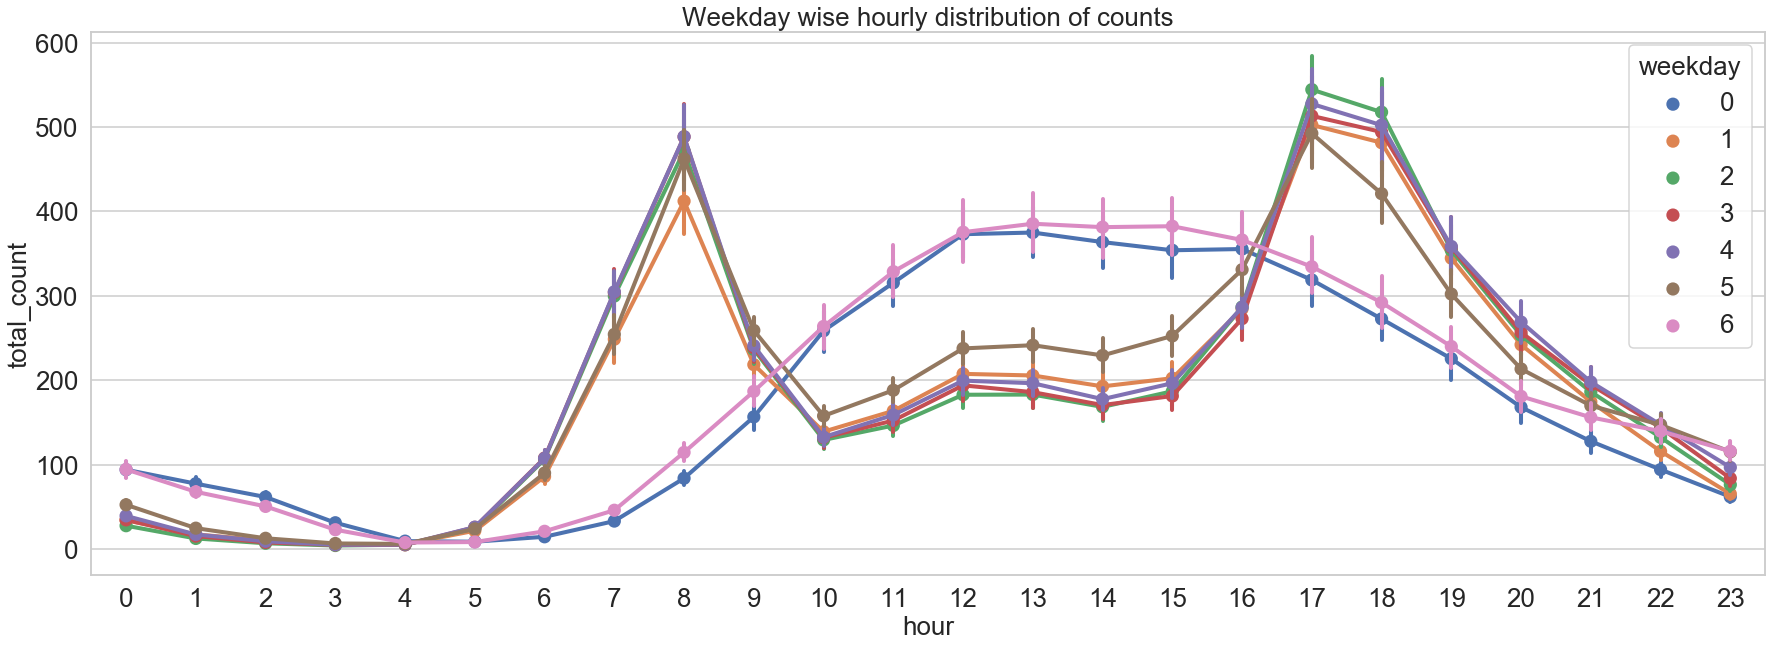

In [18]:
fig,ax = plt.subplots()
sns.pointplot(data=df[['hour',
                           'total_count',
                           'weekday']],
              x='hour',
              y='total_count',
              hue='weekday',
              ax=ax)
ax.set(title="Weekday wise hourly distribution of counts")

Observations-

1. Here 0 os for Sunday and 6 is for Saturday.

2. We can clearly observe that it shows same trends as previous chart except for the days Saturdays
   and Sundays means weekend that the graph is showing lower trend.

3. It means most of the bike sharings done on working days.

Now lets check for the monthly booking trend of bikes.

[Text(0.5, 1.0, 'Monthly distribution of counts')]

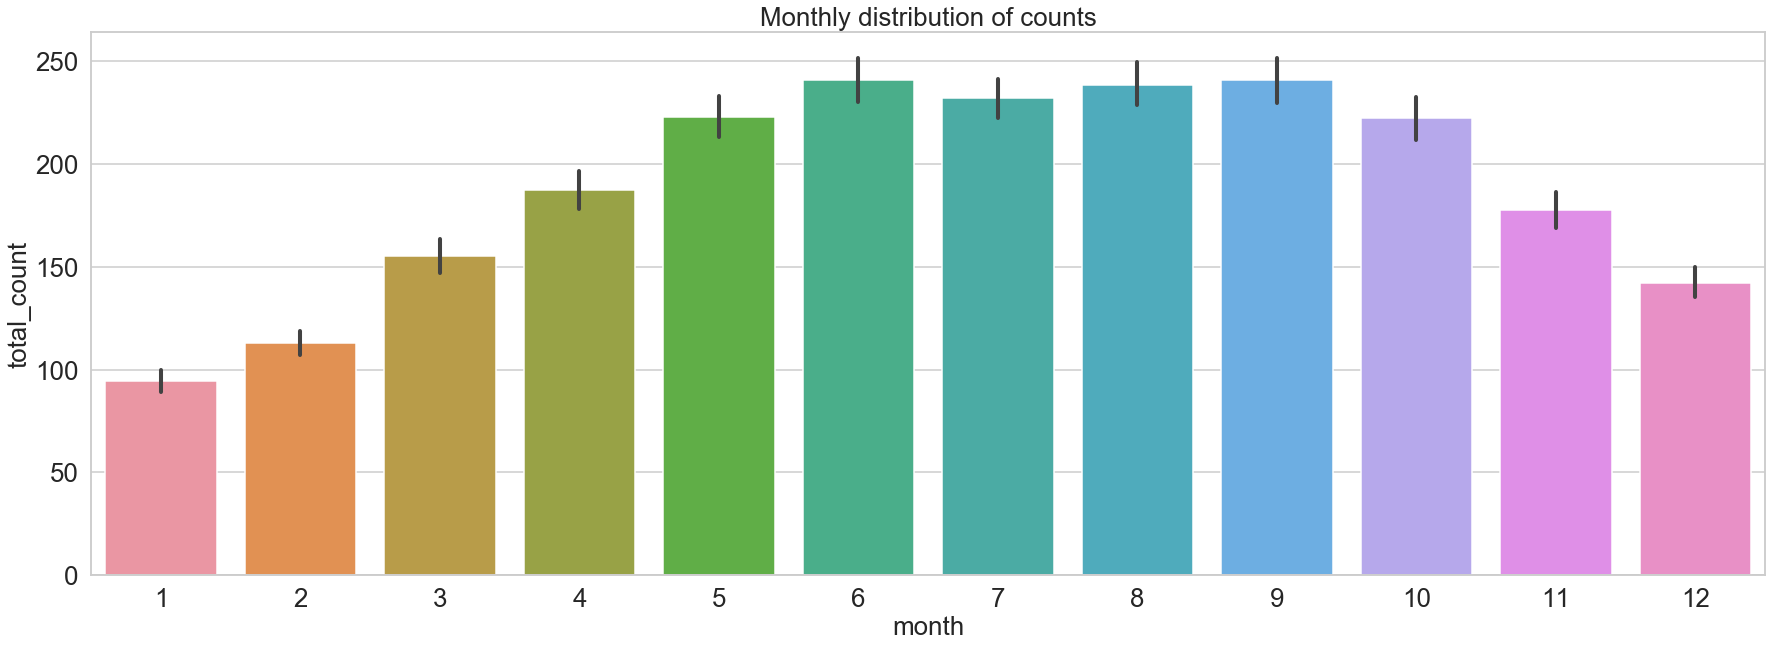

In [19]:
fig,ax = plt.subplots()
sns.barplot(data=df[['month',
                           'total_count']],
              x='month',
              y='total_count',
              ax=ax)
ax.set(title="Monthly distribution of counts")

From the above graph we can visualise that the maximum bikes get booked in the months from May to 
October.


Now lets check for seasonal trend of booking of bikes.

[Text(0.5, 1.0, 'Seasonal distribution of counts')]

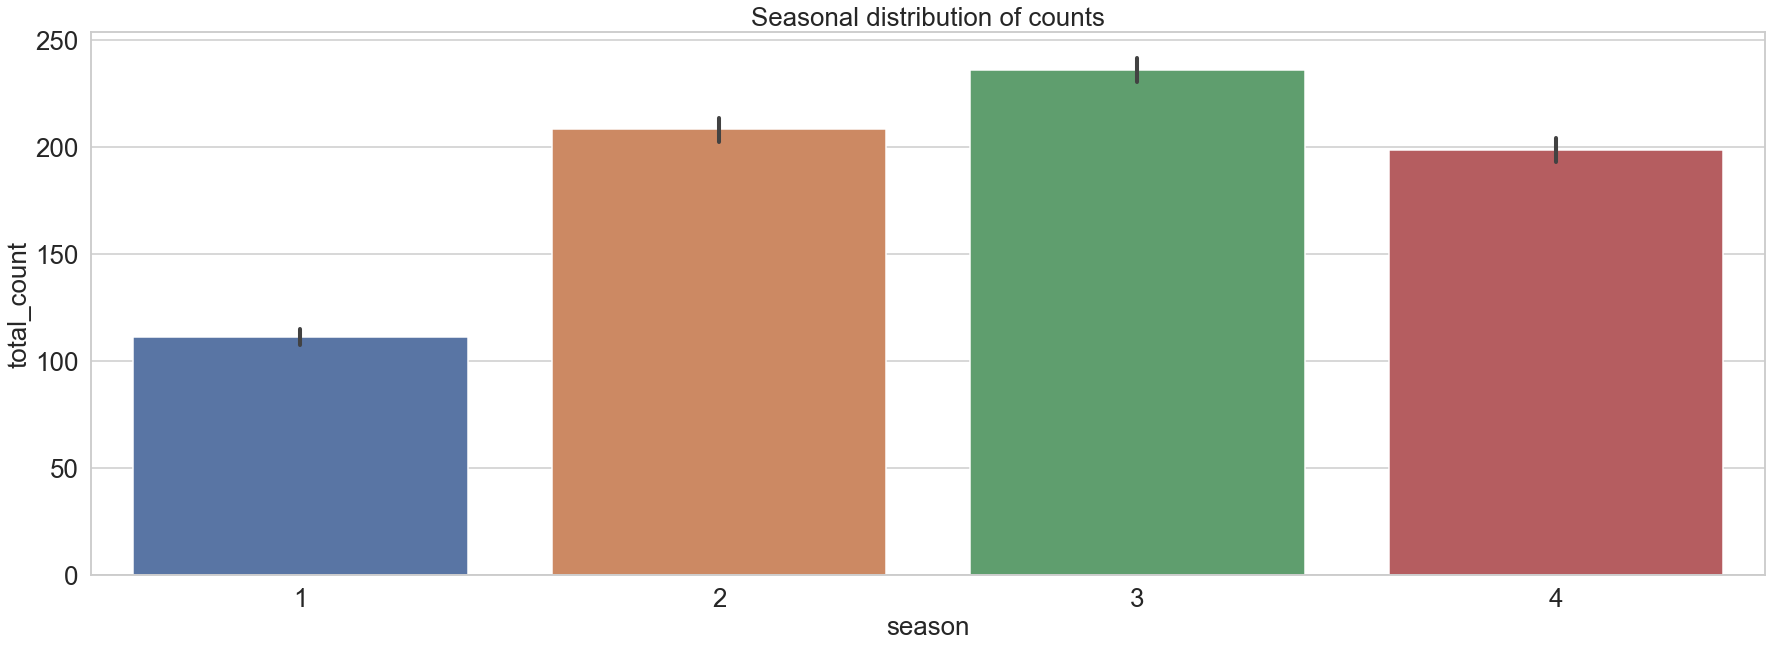

In [20]:
fig,ax = plt.subplots()
sns.barplot(data=df[['season',
                           'total_count']],
              x='season',
              y='total_count',
              ax=ax)
ax.set(title="Seasonal distribution of counts")

Explanation of above chart:-

The above chart represents following numbers as seasons-

1-spring, 2-Summer, 3-Fall, 4-Winter

Maximum bookings of bikes occur in Summer and Fall seasons ,less than these in Winter and least in 
spring.

Now lets check for yearly trend of the bookings

[Text(0.5, 1.0, 'Year distribution of counts')]

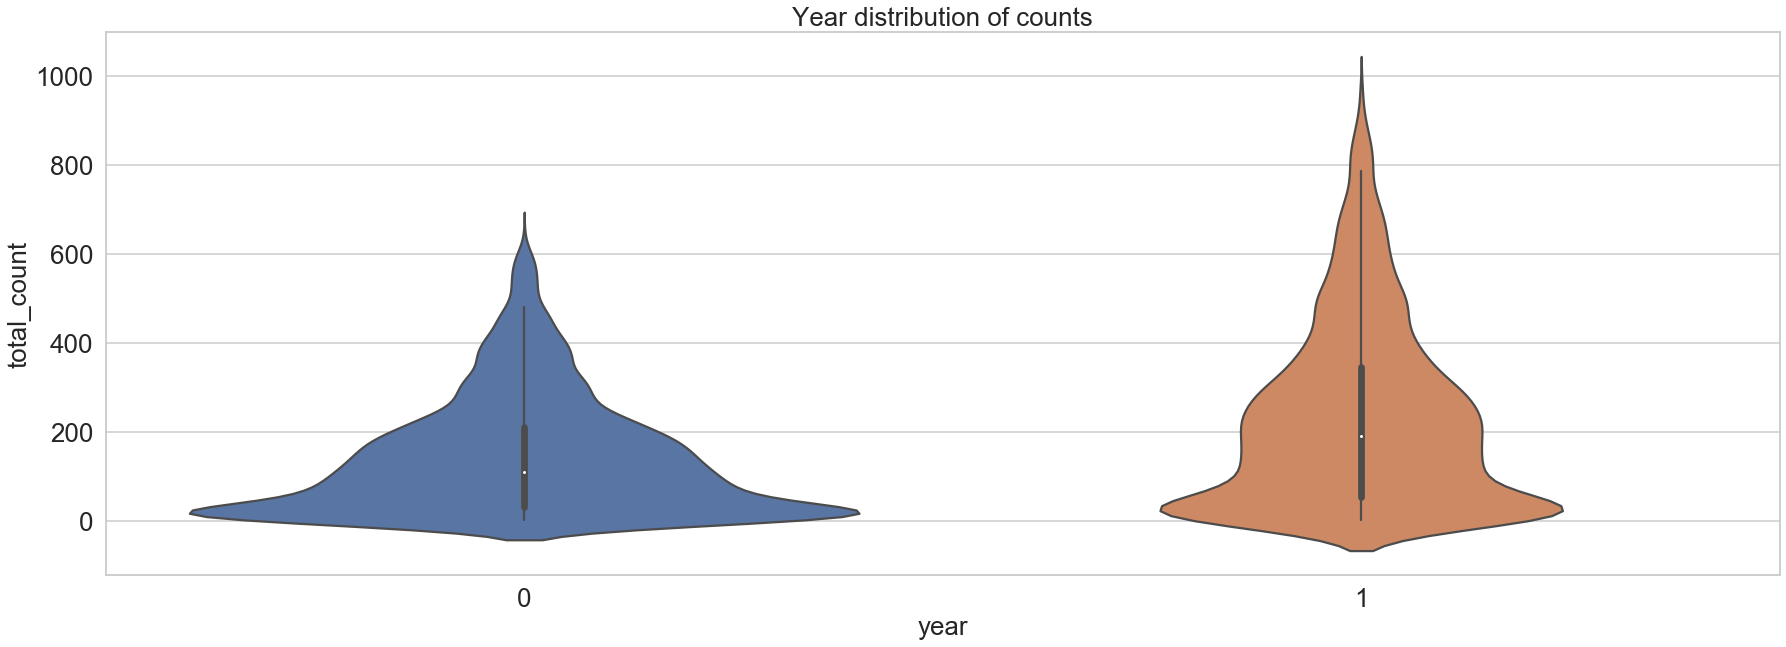

In [21]:
fig,ax = plt.subplots()
sns.violinplot(data=df[['year',
                           'total_count']],
              x='year',
              y='total_count',
              ax=ax)
ax.set(title="Year distribution of counts")

Here following numbers represent following years--

0- 2011, 

1- 2012

It is cleary shown in the graph that maximum bookings happened in the year 2012

# Feature Engineering -->> Label Encoding

Since the dataset contains multiple categorical variables, it is imperative that we encode the 
nominal ones before we use them in our modeling process.

In [22]:
#Defining categorical variable encoder method
def fit_transform_ohe(df,col_name):
    """This function performs one hot encoding for the specified
       column.
    Args:
        df(pandas.DataFrame): the data frame containing the mentioned column name
        col_name: the column to be one hot encoded
    Returns:
        tuple: label_encoder, one_hot_encoder, transformed column as pandas Series
    """
    # label encode the column
    le = LabelEncoder()
    le_labels = le.fit_transform(df[col_name])
    df[col_name+'_label'] = le_labels
    # one hot encoding
    ohe = OneHotEncoder()
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df=pd.DataFrame(feature_arr,columns=feature_labels)
    
    return le,ohe,features_df

In [23]:
#given label encoder and one hot encoder objects,
#encode attribute to ohe

def transform_ohe(df,le,ohe,col_name):
    """This function performs one hot encoding for the specified
        column using the specified encoder objects.

    Args:
        df(pandas.DataFrame): the data frame containing the mentioned column name
        le(Label Encoder): the label encoder object used to fit label encoding
        ohe(One Hot Encoder): the onen hot encoder object used to fit one hot encoding
        col_name: the column to be one hot encoded

    Returns:
        tuple: transformed column as pandas Series

    """
    # label encode
    col_labels = le.transform(df[col_name])
    df[col_name+'_label'] = col_labels
    
    # ohe
    
    feature_arr=ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels=[col_name+'_'+str(cls_label) for cls_label in le.classes_]
    feature_df=pd.DataFrame(feature_arr,columns=feature_labels)
    
    return feature_df
                    

# Divide the dataset into training and testing sets

In [24]:
df.columns


Index(['rec_id', 'datetime', 'season', 'year', 'month', 'hour', 'is_holiday',
       'weekday', 'is_workingday', 'weather_condition', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'total_count'],
      dtype='object')

In [25]:
X=df.drop(['total_count','datetime'],axis=1)
y=df['total_count']

In [26]:
X.shape

(17379, 15)

In [27]:
y.shape

(17379,)

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 49)

In [63]:
x_train.shape

(13903, 15)

In [64]:
x_test.shape

(3476, 15)

In [65]:
y_train.shape

(13903,)

In [66]:
y_test.shape

(3476,)

In [67]:
# Encoding all the categorical features
cat_attr_list = ['season','is_holiday',
                 'weather_condition','is_workingday',
                 'hour','weekday','month','year']
# though we have transformed all categoricals into their one-hot encodings, note that ordinal
# attributes such as hour, weekday, and so on do not require such encoding.
numeric_feature_cols = ['temp','humidity','windspeed',
                        'hour','weekday','month','year']
subset_cat_features =  ['season','is_holiday','weather_condition','is_workingday']

# Using One Hot Encoding for categorical columns

In [68]:

encoded_attr_list = []
ohe=OneHotEncoder()
for col in cat_attr_list:
    return_obj = fit_transform_ohe(x_train,col)
    encoded_attr_list.append({'label_enc':return_obj[0],
                              'ohe_enc':return_obj[1],
                              'feature_df':return_obj[2],
                              'col_name':col})


feature_df_list  = [x_train[numeric_feature_cols]]
feature_df_list.extend([enc['feature_df'] \
                        for enc in encoded_attr_list \
                        if enc['col_name'] in subset_cat_features])

train_df_new = pd.concat(feature_df_list, axis=1)
print("Train dataset shape::{}".format(train_df_new.shape))
print(train_df_new.head())

##############
# Test dataset
##############

ohe=OneHotEncoder()
test_encoded_attr_list = []
for enc in encoded_attr_list:
    col_name = enc['col_name']
    le = enc['label_enc']
    ohe = enc['ohe_enc']
    test_encoded_attr_list.append({'feature_df':transform_ohe(x_test,
                                                              le,ohe,
                                                              col_name),
                                   'col_name':col_name})
    
    
test_feature_df_list = [x_test[numeric_feature_cols]]
test_feature_df_list.extend([enc['feature_df'] \
                             for enc in test_encoded_attr_list \
                             if enc['col_name'] in subset_cat_features])

test_df_new = pd.concat(test_feature_df_list, axis=1) 
print("Test dataset shape::{}".format(test_df_new.shape))
print(test_df_new.head())

Train dataset shape::(16687, 19)
   temp  humidity  windspeed hour weekday month year  season_1  season_2  \
0  0.24      0.81        0.0    0       6     1    0       0.0       0.0   
1   NaN       NaN        NaN  NaN     NaN   NaN  NaN       0.0       0.0   
2   NaN       NaN        NaN  NaN     NaN   NaN  NaN       0.0       1.0   
3  0.24      0.75        0.0    3       6     1    0       0.0       0.0   
4  0.24      0.75        0.0    4       6     1    0       0.0       1.0   

   season_3  season_4  is_holiday_0  is_holiday_1  weather_condition_1  \
0       0.0       1.0           1.0           0.0                  1.0   
1       1.0       0.0           1.0           0.0                  1.0   
2       0.0       0.0           1.0           0.0                  0.0   
3       1.0       0.0           1.0           0.0                  1.0   
4       0.0       0.0           1.0           0.0                  0.0   

   weather_condition_2  weather_condition_3  weather_condition_4 

# Using Standard Scaling for making Data Standardized

In [77]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# Model Selection

The characteristics of the given problem are:

Regression: The target variable is a quantity.

Small dataset: Less than 100K samples.

Few features should be important: The correlation matrix indicates that a few features contain
the information to predict the target variable.

This characteristic makes the following methods most promising: Ridge Regression, Support
Vector Regression, Ensemble Regressor, Random Forest Regressor.

Overview Metrics
Mean Squared Error (MSE)


Root Mean Squared Logarithmic Error (RMSLE)
RMSLE 

R2 Score


We will evaluate the performance of these models in the following:

In [78]:
from sklearn.metrics import r2_score
model= [
    Lasso(alpha=0.1),
    Ridge(alpha=.5),
    
    RandomForestRegressor( random_state=0, n_estimators=300)
]
 


In [79]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred=m.predict(x_test)
    print('mean absolute error ',(mean_absolute_error(y_test,pred)))
    print('mean squared error ',(mean_squared_error(y_test,pred)))
    print("root mean squared error " ,np.sqrt(mean_squared_error(y_test,pred)))
    print('\n')

mean absolute error  2.074950708439219
mean squared error  7.507488326390036
root mean squared error  2.73997962152824


mean absolute error  2.07450215851122
mean squared error  7.783800265422986
root mean squared error  2.7899462836088773


mean absolute error  2.223987341772152
mean squared error  21.26027144866386
root mean squared error  4.610886189081645




# Random Forest Classifier

In [80]:
rf=RandomForestRegressor(n_estimators=300,random_state=0)

In [81]:
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [82]:
rf.score(x_train,y_train)

0.9999738922404195

In [83]:
pred=rf.predict(x_test)
pred

array([428.82      ,  22.26333333, 165.57666667, ..., 290.65666667,
        84.56666667,  18.94666667])

In [84]:
print('mean absolute error ',(mean_absolute_error(y_test,pred)))
print('mean squared error ',(mean_squared_error(y_test,pred)))
print("root mean squared error " ,np.sqrt(mean_squared_error(y_test,pred)))

mean absolute error  2.223987341772152
mean squared error  21.26027144866386
root mean squared error  4.610886189081645


In [85]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.9993472639797881


In [86]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)


1.0

In [87]:
pred=lr.predict(x_test)
pred

array([427.00994751,  22.46952275, 164.51972879, ..., 290.96892139,
        84.34751024,  19.57702683])

In [88]:
print('mean absolute error ',(mean_absolute_error(y_test,pred)))
print('mean squared error ',(mean_squared_error(y_test,pred)))
print("root mean squared error " ,np.sqrt(mean_squared_error(y_test,pred)))

mean absolute error  2.074502158511217
mean squared error  7.804537242181215
root mean squared error  2.793660187313628


In [93]:
print(r2_score(y_test,pred))

0.9997603839352965


# Using Ensemble Technique to avoid Overfitting 

In [99]:
from sklearn.ensemble import AdaBoostRegressor
adboost=AdaBoostRegressor()
adboost.fit(x_train,y_train)
print(adboost.score(x_train,y_train))
abpred=adboost.predict(x_test)
print(abpred)
adboost.score(x_test,y_test)


0.9802630305047919
[420.82359427  41.34598304 170.83208808 ... 281.57111437 102.55555556
  41.34598304]


0.9773094606772604

In [101]:
print(r2_score(y_test,abpred))

0.9773094606772604


# Storing the predicted results in csv file

In [102]:
abpred=pd.DataFrame(abpred,columns=['abpred']).to_csv('bike-sharing-hour')

# Saving the best Model as a pickle in a file.

I have selected AdaBoosterRegressor Model as best model as it is giving me best score after
performing overfitting 

In [103]:
from sklearn.externals import joblib

In [104]:
joblib.dump(adboost,'bike-sharing-hour.pkl')

['bike-sharing-hour.pkl']